# Smoothing & Reducing noise on Data

In [20]:
# http://blog.daum.net/neuronics/7568119
# https://stackoverflow.com/questions/37598986/reducing-noise-on-data

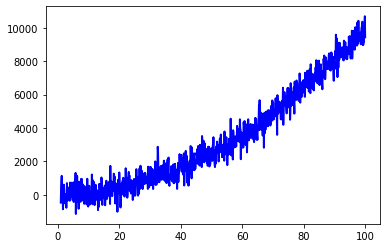

In [21]:
import matplotlib.pyplot as plt
import numpy as np 

mu, sigma = 0, 500

x = np.arange(1, 100, 0.1)  # x axis
z = np.random.normal(mu, sigma, len(x))  # noise
y = x ** 2 + z # data
plt.plot(x, y, linewidth=2, linestyle="-", c="b")

In [22]:
len(y)

990

## IIR 필터(Infinite Impulse Response Filter)

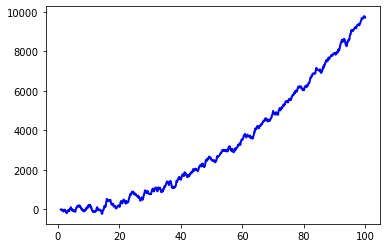

In [10]:
from scipy.signal import lfilter

n = 15  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1
yy = lfilter(b,a,y)
plt.plot(x, yy, linewidth=2, linestyle="-", c="b") 

## Savitzky-Golay filter
- 데이터를 평활화하기 위해, 즉 신호 경향을 왜곡하지 않고 데이터의 정밀도를 높이기 위해 일련의 디지털 데이터 포인트에 적용 할 수있는 디지털 필터
- 스펙트럼 전처리에서 일반적으로 사용되는 방법
- 특정 길이의 창내 데이터 포인트에 대해 k차 다항식 피팅을 수행하여 피팅된 결과를 얻는것 
- 이산화후 Savitzky-Golay filter는 실제로 윈도우 이동에 대한 가중평균 알고리즘이지만, 가중 계수는 단순한 상수 윈도우가 아니라 슬라이딩 윈도우에서 주어진 고차 다항식의 최소 제곱
- 피팅을 곱함
- 출처 : https://blog.csdn.net/sinat_21258931/article/details/79298478

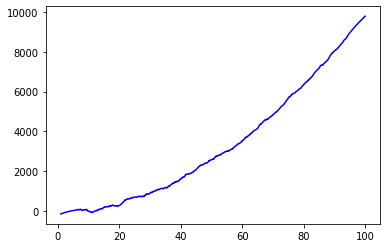

In [11]:
from scipy.signal import savgol_filter
w = savgol_filter(y, 101, 2)
plt.plot(x, w, 'b')  # high frequency noise removed

# Wavelet Denoising
- https://www.kaggle.com/tarunpaparaju/ion-switching-competition-signal-eda
- 신호에서 불필요한 노이즈 제거하는 방법 => Wavelet Coefficients 계산
- Wavelet Coefficients 는 유지할 정보(Signal)과 버릴 정보(Noise) 결정
- 평균 절대 편차(MAD) 값을 사용하여 신호의 Randomness을 이해하고 시계열의 웨이블릿 계수에 대한 최소 임계값 결정
- 웨이블릿 계수에서 낮은 계수를 결정하고 나머지 계수에서 신호를 재구성 

In [12]:
# ! pip install PyWavelets
import pywt 

In [13]:
def maddest(d, axis=None):
    return np.mean(np.absolute(d - np.mean(d, axis)), axis)

def denoise_signal(x, wavelet='db4', level=1):
    coeff = pywt.wavedec(x, wavelet, mode="per")
    sigma = (1/0.6745) * maddest(coeff[-level])

    uthresh = sigma * np.sqrt(2*np.log(len(x)))
    coeff[1:] = (pywt.threshold(i, value=uthresh, mode='hard') for i in coeff[1:])

    return pywt.waverec(coeff, wavelet, mode='per')

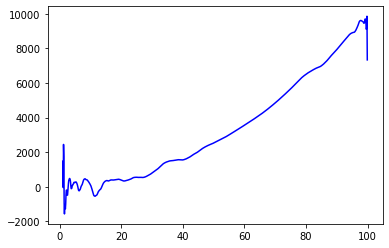

In [15]:
y_w = denoise_signal(y)
plt.plot(x, y_w, 'b')

# Average smoothing

In [16]:
def average_smoothing(signal, kernel_size=3, stride=1):
    sample = []
    start = 0
    end = kernel_size
    while end <= len(signal):
        start = start + stride
        end = end + stride
        sample.extend(np.ones(end - start)*np.mean(signal[start:end]))
    return np.array(sample)

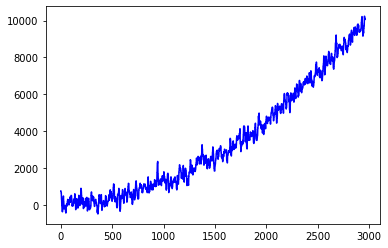

In [25]:
y_A = average_smoothing(y)
plt.plot(y_A, 'b')

In [27]:
print(len(y))
print(len(x))
print(len(y_A))

990
990
2964
